# Описание

Данная тетрадка содержит в себе первое задание по компьютерному практикуму по экономике. Вам предстоит освоить ряд важных библиотек для Python, изучить основы Latex, а также создать экономические модели.

Все задания связаны с моделями бюджетных ограничений и предпочтений. 
* В первой модели существуют только два товара определенной цены. 
* Во второй модели определены 3 параметра: название, цена и количество товара, которое потребитель может получить бесплатно. За товар сверх этого количества необходимо заплатить указанную цену.
* В третьей модели для каждого товара есть порог количества. Товар в количестве ниже данного порога стоит одну цену, а каждая единица товара выше этого порога стоит другую цену.

Ожидается, что Вы разберетесь в представленных примерах и по их образцу сделаете более сложные задания. Также стремитесь к тому, чтобы Ваш код и Ваши пояснения были понятными. При необходимости комментируйте код и оставляйте заметки в текстовых полях.

## Баллы

За каждое задание начисляется определенное количество баллов. Если задание решено не полностью, то за него может быть начислена только часть баллов.

|№ Задания|Балл|
|---|---|
|[Задание 1](#task_1)|0.5|
|[Задание 2](#task_2)|0.5|
|[Задание 3](#task_3)|0.5|
|[Задание 4](#task_4)|0.5|
|[Задание 5](#task_5)|1|
|[Задание 6](#task_6)|0.5|
|[Задание 7](#task_7)|1|
|[Задание 8](#task_8)|1|
|[Задание 9](#task_9)|0.5|
|[Задание 10](#task_10)|0.5|
|[Задание 11](#task_11)|1|
|[Задание 12](#task_12)|1|
|[Задание 13](#task_13)|1.5|
|Всего|10|

## Импорт библиотек

In [437]:
#Импортируем необходимые библиотеки

import math
import numpy as np # Линейная алгебра и многомерные массивы
import pandas as pd # Работа с таблицами данных
import matplotlib.pyplot as plt # Графическая библиотека
from ipywidgets import widgets, interact # Интерактивные виджеты

# Техническая функция. Иногда потребуется сравнивать два float числа на равенство
def is_equal(x, y):
    return abs(x-y) < 1e-6

# Модель 1

## Описание класса

В данной модели у каждого товара есть только два параметра: название и цена за единицу.

In [438]:
# Создадим класс для товаров модели
class Good():
    def __init__(self, name, price):
        self.name = name
        self.price = price

## Проверка бюджетного ограничения

Напишем функцию, которая проверит, удовлетворяет ли конкретная точка бюджетным ограничениям.

In [439]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
    Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    result = x1*g1.price + x2*g2.price
    if (is_equal(result, budget)): # Поскольку значения типа float, необходимо сравнивать на равенство с погрешностью
        return 0
    elif (result < budget):
        return 1
    else:
        return -1

g1 = Good("Яблоки", 5)
g2 = Good("Груши", 5)
budget = 100    
print(budget_test(g1, g2, budget, 1, 1))
print(budget_test(g1, g2, budget, 10, 10))
print(budget_test(g1, g2, budget, 100, 100))

1
0
-1


## Графическое представление

Напишем функцию, которая будет визуализировать бюджетное множество и проверяемую точку.

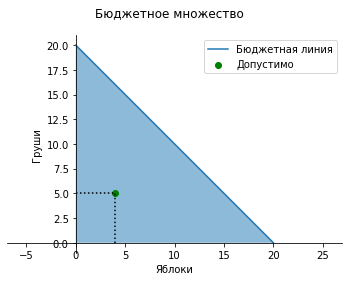

In [440]:

def plot_budget(g1, g2, budget, x1=0, x2=0):
    '''
    Построение графика бюджетного множества и расположения проверяемой точки
    '''
    
    # График будет построен по двум точкам (0, budget/g2.price) и (budget/g1.price, 0)
    x_points = [0, budget/g1.price] 
    y_points = [budget/g2.price, 0]
    

    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")
    
    ax.plot(x_points, y_points, label="Бюджетная линия") # Строим прямую по двум точкам
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5
    
    point_status = budget_test(g1, g2, budget, x1, x2) # Находим статус проверяемой точки
    
    # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else: 
        point_color = "red"
        point_label = "Недопустимо"
    
    ax.scatter(x1, x2, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x1, x1], [0, x2], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
    ax.plot([0, x1], [x2, x2], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)
    
    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    
    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок


g1 = Good("Яблоки", 5)
g2 = Good("Груши", 5)
budget = 100   
plot_budget(g1, g2, budget, 4, 5);

## Интерактивное представление

In [441]:
# Интерактивный виджет
def interactive_plot(p1, p2, budget, x1, x2):
    g1 = Good("Яблоки", p1) # Создаем первый товар с ценой p1
    g2 = Good("Груши", p2) # Создаем второй товар с ценой p2
    plot_budget(g1, g2, budget, x1, x2);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), x1 = (1,10), x2=(1,10));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

## Работа с таблицами

В данном разделе мы будем работать с таблицами. Вначале мы загрузим данные из Excel файла в датафрейм библиотеки pandas. Затем мы обработаем строки этой таблицы, и для каждой строки проверим, выполняется ли бюджетное ограничение, и результаты сохраним в новый датафрейм. Далее мы отфильтруем получившийся датафрейм по условию, что бюджетное ограничение выполняется (в том числе на границе). Результат мы отсортируем по размеру бюджета и сохраним в новый Excel файл.

Файл model1_data.xlsx должен находиться в том же каталоге, что и данная тетрадка. Файл можно скачать по [данной ссылке](http://samonenko.ru/upload/model1_data.xlsx).

In [442]:
df = pd.read_excel("model1_data.xlsx") # Загрузим таблицу из Excel файла в датафрейм 
df # Печатаем датафрейм

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant
0,Яблоки,5,Груши,5,50,5,5
1,Яблоки,5,Груши,5,51,5,5
2,Апельсины,5,Мандарины,5,49,5,5
3,Виоград,2,Малина,3,30,23,45
4,Виоград,2,Малина,3,30,6,8
5,Виоград,2,Малина,3,45,6,8


In [443]:
result = []
for index, row in df.iterrows(): # Цикл по всем строкам df
    # Строка сохраняется в словаре row, где ключами являются имена столбцов
    
    # Для каждой строки создаем продукты
    g1 = Good(row['G1_name'], row['G1_price']) 
    g2 = Good(row['G2_name'], row['G2_price'])

    result.append(budget_test(g1, g2, row['Budget'], row['G1_quant'], row['G2_quant']))

df["Result"] = result # Создаем в df новый столбец Result и сохраняем в него список значений result
df

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1
2,Апельсины,5,Мандарины,5,49,5,5,-1
3,Виоград,2,Малина,3,30,23,45,-1
4,Виоград,2,Малина,3,30,6,8,-1
5,Виоград,2,Малина,3,45,6,8,1


In [444]:
df_super = df[df["Result"] >= 0] # Фильтруем датафрейм по условию, что в столбце Result значение >= 0 и сохраняем в новый датафрейм
df_super

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1
5,Виоград,2,Малина,3,45,6,8,1


In [445]:
df_super = df_super.sort_values(by = 'Budget') # Сортируем датафрейм по столбцу Budget и сохраняем в тот же датафрейм
df_super

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
5,Виоград,2,Малина,3,45,6,8,1
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1


In [446]:
df_super.to_excel("model1_result.xlsx") # Сохраняем 

## Обратная задача

### Случай двух товаров

Решим обратную задачу, теперь мы должны узнать стоимости товаров, если известны точки, которые лежат на границе кривой бюджетных ограничений.

Пусть нам известно, что две точки $A_1 = (a_{1,1}, a_{1,2})$ и $A_2 = (a_{2,1}, a_{2,2})$ лежат на границе кривой бюджетных ограничений. В нашей модели бюджетное ограничение задается прямой вида:
$$p_1 x_1 + p_2 x_2 = b,$$ 
где $p_1$ -- цена единицы первого продукта, $p_2$ -- цена единицы второго продукта и $b$ -- общий бюджет. Без ограничения общности мы можем считать, что $b=1$, т.е. мы должны найти значения цены единиц продукта как долей от общего бюджета.

Таким образом, нам надо решить систему линейных уравнений:
$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} = 1\\
p_1 a_{2,1} + p_2 a_{2,2} = 1
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} \\
    a_{2,1} & a_{2,2}
\end{pmatrix}
\begin{pmatrix}
    p_1 \\
    p_2
\end{pmatrix}
= 
\begin{pmatrix}
    1 \\
    1
\end{pmatrix}
$$

Решением является: 
$$
\begin{pmatrix}
        p_1 \\
        p_2
\end{pmatrix}
=
\begin{pmatrix}
        a_{1,1} && a_{1,2} \\
        a_{2,1} && a_{2,2} 
\end{pmatrix}^{-1}
\begin{pmatrix}
    1 \\
    1
\end{pmatrix}
$$

При этом надо учесть, что $p_1 > 0$ и $p_2 > 0$, в противном случае полученное решение не соответствует изучаемой модели.

In [447]:
def get_goods_parameters(list_of_points):
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''
    
    ones = np.ones([2,1]) # матрица 2x1 из единиц 

    # np.linalg.inv() -- поиск обратной матрицы
    # A @ B -- матричное умножение 
    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = [
    [1,2],
    [2,1]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [1,2],
    [2,2]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [2,2],
    [2,1]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [1,1],
    [2,2]
]
print(get_goods_parameters(list_of_points))


[[0.33333333]
 [0.33333333]]
None
None
None


### Графическое представление

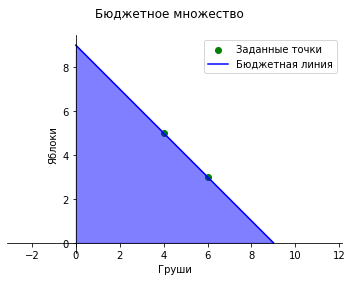

In [448]:
def plot_goods_parameters(list_of_points):

    fig, ax = plt.subplots() # Создаем фигуру

    list_of_points = np.array(list_of_points)
    x_values = list_of_points.T[0]
    y_values = list_of_points.T[1]
    ax.scatter(x_values, y_values, label="Заданные точки", color="green")
            
    ax.axis('equal') # Принудительно делаем оси равными

    result = get_goods_parameters(list_of_points)
    if not (result is None):
        fig.suptitle("Бюджетное множество")
        g1 = Good("Груши", result[0][0])
        g2 = Good("Яблоки", result[1][0])
        budget = 1
        x_points = [0, budget/g1.price] 
        y_points = [budget/g2.price, 0]
        
        ax.plot(x_points, y_points, label="Бюджетная линия", color="blue") # Строим прямую по двум точкам
        ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5, color="blue") # Заливаем область под графиком с прозрачностью (alpha) 0.5
       
         # Добавляем название осей
        ax.set_xlabel(g1.name)
        ax.set_ylabel(g2.name)

        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)

    else:
        fig.suptitle("Модель не предусматривает решения")

    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show()



list_of_points = [
    [4,5],
    [6,3]
]
plot_goods_parameters(list_of_points)

### Интерактивное представление

In [449]:
# Интерактивный виджет
def interactive_plot(x11, x12, x21, x22):
    list_of_points = [
        [x11, x12],
        [x21, x22]
    ]
    plot_goods_parameters(list_of_points);

interact(interactive_plot, x11=(1, 10), x12 = (1, 10), x21=(1, 10), x22 = (1, 10));

interactive(children=(IntSlider(value=5, description='x11', max=10, min=1), IntSlider(value=5, description='x1…

### Случай трех товаров

Отметим, что рассуждения и код практически не поменяются, если речь пойдет о трех товарах и трех точках в трехмерном пространстве.

Пусть нам даны три точки $A_1 = (a_{1,1}, a_{1,2}, a_{1,3})$, $A_2 = (a_{2,1}, a_{2,2}, a_{2,3})$ и $A_3 = (a_{3,1}, a_{3,2}, a_{3,3})$. Надо решить систему линейных уравнений:

$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} + p_3 a_{1,3}= 1\\
p_1 a_{2,1} + p_2 a_{2,2} + p_3 a_{2,3}= 1\\
p_1 a_{3,1} + p_2 a_{3,2} + p_3 a_{3,3}= 1\\
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} & a_{1,3}\\
    a_{2,1} & a_{2,2} & a_{2,3}\\
    a_{3,1} & a_{3,2} & a_{3,3}\\
\end{pmatrix}
\begin{pmatrix}
        p_1 \\
        p_2 \\
        p_3
\end{pmatrix}
= 
\begin{pmatrix}
        1 \\
        1 \\
        1
\end{pmatrix}
$$

Решением является: 
$$
\begin{pmatrix}
        p_1 \\
        p_2 \\
        p_3
\end{pmatrix}
=
\begin{pmatrix}
    a_{1,1} & a_{1,2} & a_{1,3}\\
    a_{2,1} & a_{2,2} & a_{2,3}\\
    a_{3,1} & a_{3,2} & a_{3,3}\\
\end{pmatrix}^{-1}
\begin{pmatrix}
        1 \\
        1 \\
        1
\end{pmatrix}
$$

In [450]:
def get_goods_parameters(list_of_points):
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''
    
    ones = np.ones([3,1]) # единственное изменение тут

    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = [
    [0,0,1],
    [0,1,0],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [0,0,1],
    [0,1,1],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

[[1.]
 [1.]
 [1.]]
None


### Случай $n$ товаров. <font color="red">Задание 1.</font> <a id="task_1"></a>

Реализуйте предыдущий пример для случая $n$ товаров. Вам надо написать поясняющий текст, используя $\LaTeX$, а также реализовать саму функцию.

Пусть нам даны $n$ точек $A_1 = (a_{1,1}, a_{1,2}, \dots ,a_{1,n})$, $A_2 = (a_{2,1}, a_{2,2}, \dots, a_{2,n})$, $\dots$, $A_n = (a_{n,1}, a_{n,2}, \dots, a_{n,n})$. Надо решить систему линейных уравнений: 

Проверяем количество товаров в системе вызывая, решаем её для общего случая.

In [451]:
def get_goods_parameters(list_of_points: np.array):
    list_of_points = np.array(list_of_points)
    n1, n2 = list_of_points.shape
    if n1 != n2:
        print("неправильный размер матрицы")
        return None
    n = n1 #находим размер матрицы
    
    ones = np.ones([n,1]) # единственное изменение тут

    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = np.eye(10) # Единичная матрица
print(get_goods_parameters(list_of_points))

list_of_points = [
    [0,0,1],
    [0,1,1],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
None


## Кривые безразличия

### Параметры функции полезности Кобба-Дугласа

Напишем функцию, которая будет строить графики кривых безразличия функции полезности Кобба-Дугласа вида
$$c = x^{\alpha}y^{1-\alpha}$$
при различных значениях параметров $c$ и $\alpha$.

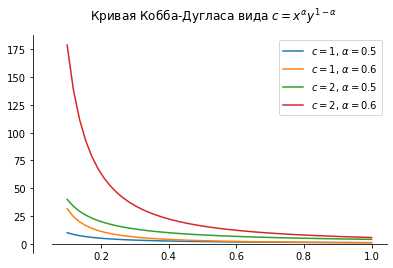

In [452]:
def Cobb_Douglas(x, c=1, alpha=0.9):
    # Выразим в явном виде y как функцию от x
    return math.pow(x, -alpha/(1-alpha))*math.pow(c, 1/(1-alpha))

def plot_Cobb_Douglas(c_values, alpha_values):
    x_values = np.linspace(0.1, 1) # Массив из 50 точек от 0.1 до 1

    fig, ax = plt.subplots()
    fig.suptitle("Кривая Кобба-Дугласа вида $c = x^{\\alpha}y^{1-\\alpha}$") # Двойные слеши нужны, чтобы не экранировать следующий символ
    for c in c_values:
        for alpha in alpha_values:
            y_values = [Cobb_Douglas(x, c, alpha) for x in x_values]    
            ax.plot(x_values, y_values, label=f"$с = {c}$, $\\alpha = {alpha} $")
    

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.legend()
    

c_values = [1, 2]
alpha_values = [0.5, 0.6]
plot_Cobb_Douglas(c_values, alpha_values)

### Поиск и визуализация оптимального решения для функции Кобба-Дугласса

Напишем функцию, которая по информации о двух товарах, бюджете и параметре $\alpha$ функции полезности Кобба-Дугласа найдет оптимальное решение, т.е. точку касания кривой безразличия функции Кобба-Дугласа и границы бюджетного ограничения.

Известно, что решение можно найти по формуле:
$$
\begin{cases}
x_1 = \frac{\alpha}{g1.price}\\
x_2 = \frac{1-\alpha}{g2.price}\\
\end{cases}
$$

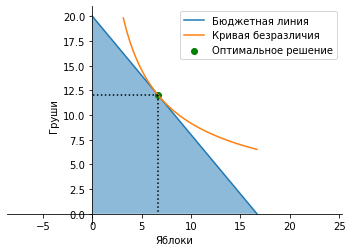

In [453]:
def budget_Cobb_Douglas_solution(g1, g2, budget, alpha=0.5):
    '''
        При заданных ценах на товары, бюджете и параметре alpha находит оптимальное решение и
        значение выражения x^(alpha) * y^(1-alpha)
    '''
    x_solution = alpha*budget/g1.price
    y_solution = (1-alpha)*budget/g2.price
    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)

def plot_budget_Cobb_Douglas(g1, g2, budget, alpha=0.5):
    x_solution, y_solution, c = budget_Cobb_Douglas_solution(g1, g2, budget, alpha)
    
    x_points = [0, budget/g1.price]
    y_points = [budget/g2.price, 0]
    fig, ax = plt.subplots()
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)
    
    x_values = np.linspace(0.1, budget/g1.price)
    y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values])
    filter = y_values < budget/g2.price
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

g1 = Good("Яблоки", 6)
g2 = Good("Груши", 5)
budget = 100 
alpha = 0.4
plot_budget_Cobb_Douglas(g1, g2, budget, alpha)

### Интерактивная визуализация оптимального решения для функции Кобба-Дугласа

In [454]:
def interactive_plot(p1, p2, budget, alpha):
    g1 = Good("Яблоки", p1)
    g2 = Good("Груши", p2)
    plot_budget_Cobb_Douglas(g1, g2, budget, alpha);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

### Параметры функции полезности Леонтьева. <font color="red">Задание 2</font> <a id="task_2"></a>

Напишите код, который визуализирует графики кривых безразличия для функции Леонтьева вида 
$$
с = \min(\frac{x}{a}, \frac{y}{b})
$$
при различных значениях параметров $а$ и $b$.

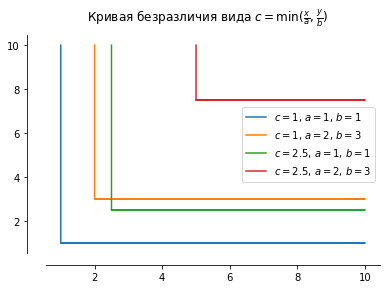

In [455]:
def Leontev1(x, c=1, a = 1, b = 1):
    # если однозачно определен x
    if (x/a) < c:
        return None
    if x/a >= c:
        return c*b
    
def Leontev2(y, c = 1, a = 1, b = 1):
    # если однозначно определен y
    if y/b < c:
        return None
    if y/b >= c:
        return c*a

#добавили массив из c(в примере одно значение c)
def plot_Leontev(c_values, a_values, b_values):
    x_values = []
    y_values = []
    x_values1 = np.linspace(0, 10, 1000) # Массив из точек от 0.1 до 10
    y_values1 = np.linspace(0, 10, 1000)
    fig, ax = plt.subplots()
    fig.suptitle("Кривая безразличия вида $c = \\min(\\frac{x}{a}, \\frac{y}{b})$") # Двойные слеши нужны, чтобы не экранировать следующий символ
    for c in c_values:
        for i in range(len(a_values)):
            x_values = []
            y_values = []
            a = a_values[i]
            b = b_values[i]
            for j in range(len(x_values1)):
                y_value = Leontev1(x_values1[j], c, a, b)
                if not (y_value is None):
                    y_values.append(y_value)
                    x_values.append(x_values1[j])
            for k in range(len(x_values1)):
                x_value = Leontev2(x_values1[k], c, a, b)
                if not (x_value is None):
                    y_values.append(x_values1[k])
                    x_values.append(x_value)    
            ax.plot(x_values, y_values, label=f"$с = {c}$, $a = {a} $, $ b = {b} $")
    

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.legend()
    

c_values = [1, 2.5]
a_values = [1, 2]
b_values = [1, 3]
plot_Leontev(c_values, a_values, b_values)

### Поиск и визуализация оптимального решения для функции полезности Леонтьева. <font color="red">Задание 3</font> <a id="task_3"></a>

Для двух заданных товаров $g1$, $g2$, величины бюджета $budget$, а также параметров $a$ и $b$ функции полезности Леонтьева, найдите оптимальное решение и визуализируйте его.

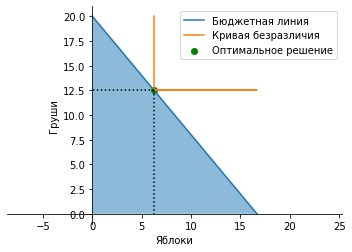

In [456]:
def budget_Leontev_solution(g1, g2, budget, a, b):
    '''
        При заданных ценах на товары, бюджете и параметрах a, b находит оптимальное решение
        и уровень полезности, формула дял случая, когда x/a == y/b, т.к. мы ищем минимум
    '''
    x_solution = (budget*a)/(b*g2.price + a*g1.price)
    y_solution = (budget*b)/(b*g2.price + a*g1.price)
    c = (budget)/(b*g2.price + a*g1.price)
    return x_solution, y_solution, c

def plot_budget_Leontev(g1, g2, budget, a, b):
    x_solution, y_solution, c = budget_Leontev_solution(g1, g2, budget, a, b)
    
    x_points = [0, budget/g1.price]
    y_points = [budget/g2.price, 0]
    fig, ax = plt.subplots()
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)
    
    x_values1 = np.linspace(0, budget/g1.price,1000)
    y_values1 = np.linspace(0, budget/g2.price,1000)
    x_values = []
    y_values = []
    for x in x_values1:
        y_value = Leontev1(x, c, a, b)
        if not (y_value is None):
            y_values.append(y_value)
            x_values.append(x)
    for y in y_values1:
        x_value = Leontev2(y, c, a, b)
        if not (x_value is None):
            x_values.append(x_value)
            y_values.append(y)
    ax.plot(x_values, y_values, label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()


g1 = Good("Яблоки", 6)
g2 = Good("Груши", 5)
budget = 100 
a = 1
b = 2
plot_budget_Leontev(g1, g2, budget, a, b)

### Интерактивная визуализация оптимального решения для функции полезности Леонтьева

In [457]:
def interactive_plot(p1, p2, budget, a, b):
    g1 = Good("Яблоки", p1)
    g2 = Good("Груши", p2)
    plot_budget_Leontev(g1, g2, budget, a, b);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), a=(1,10), b=(1,10));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

# Модель 2

## Описание класса

В данной модели у каждого товара есть три параметра: название, цена и количество такого товара, которое можно получить бесплатно.
Это означает, что потребитель всегда может получить бесплатно товар в заданном количестве, а за каждую следующую единицу товара необходимо заплатить указанную цену.

In [458]:
class Good():
    def __init__(self, name, price, free):
        self.name = name
        self.price = price
        self.free = free # Количество продукта, которое можно получить бесплатно

## Проверка бюджетного ограничения. <font color="red">Задание 4</font><a id="task_4"></a>

Напишем функцию, которая проверит, удовлетворяет ли конкретная точка бюджетным ограничениям.

In [459]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    if x1 < g1.free or is_equal(x1, g1.free):
        abs_x1 = 0
    else:
        abs_x1 = x1 - g1.free
    if x2 < g2.free or is_equal(x2, g2.free):
        abs_x2 = 0
    else:
        abs_x2 = x2 - g2.free
    if is_equal((abs_x1*g1.price + abs_x2*g2.price),budget): 
        return 0
    elif abs_x1*g1.price + abs_x2*g2.price < budget:
        return 1
    else:
        return -1

g1 = Good("Яблоки", 10, 1)
g2 = Good("Груши", 10, 1)
budget = 100
print(budget_test(g1, g2, budget, 5, 6))
print(budget_test(g1, g2, budget, 6, 6))
print(budget_test(g1, g2, budget, 6, 7))

1
0
-1


## Графическое представление. <font color="red">Задание 5.</font> <a id="task_5"></a>

Напишите функцию, которая будет изображать бюджетное множество и проверяемую точку.

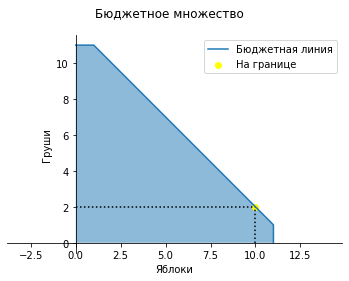

In [460]:
def plot_budget(g1, g2, budget, x1=0, x2=0):
    x_points = [0,g1.free, budget/g1.price + g1.free, budget/g1.price + g1.free] 
    y_points = [budget/g2.price + g2.free,budget/g2.price + g2.free, g2.free, 0]
    

    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")
    
    ax.plot(x_points, y_points, label="Бюджетная линия") # Строим прямую по двум точкам
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5
    
    point_status = budget_test(g1, g2, budget, x1, x2) # Находим статус проверяемой точки
    
    # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else: 
        point_color = "red"
        point_label = "Недопустимо"
    
    ax.scatter(x1, x2, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x1, x1], [0, x2], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
    ax.plot([0, x1], [x2, x2], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)
    
    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    
    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок


    
g1 = Good("Яблоки", 10, 1)
g2 = Good("Груши", 10, 1)
budget = 100
plot_budget(g1, g2, budget, 10, 2)

## Интерактивное представление

In [461]:
def interactive_plot(p1, f1, p2, f2, budget, x, y):
    g1 = Good("Яблоки", p1, f1)
    g2 = Good("Груши", p2, f2)
    plot_budget(g1, g2, budget, x, y);

interact(interactive_plot, p1=(1, 10), f1=(0, 10), p2 = (1, 10), f2=(0,10), budget=(1,100), x=(0,10), y=(0,10))

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='f1'…

<function __main__.interactive_plot(p1, f1, p2, f2, budget, x, y)>

## Работа с таблицами. <font color="red">Задание 6</font><a id="task_7"></a>

Выполните аналогичные действия, как и с моделью 1, а именно:
* Создайте файл model2_data.xlsx по аналогии с тем, как устроен файл model1_data.xlsx. И добавьте в него как минимум 10 строчек.
* Загрузите данные из таблицы model2_data.xlsx
* Для каждой записи проверьте, выполнено ли бюджетное ограничение.
* Отфильтруйте только те варианты, в которых бюджетное ограничение выполняется (в том числе и на границе).
* Отсортируйте таблицу по столбцу G1_free.
* Результат сохраните в файл model2_result.xlsx

Допускается в этом задании вместо Excel файлов использовать csv файлы.

In [462]:
df2 = pd.read_excel("model2_data.xlsx") # Загрузим таблицу из Excel файла в датафрейм 
df2 # Печатаем датафрейм

result = []
for index, row in df2.iterrows():  # Цикл по всем строкам df
    # Строка сохраняется в словаре row, где ключами являются имена столбцов

    # Для каждой строки создаем продукты
    g1 = Good(row['G1_name'], row['G1_price'], row['G1_free'])
    g2 = Good(row['G2_name'], row['G2_price'], row['G2_free'])

    result.append(budget_test(g1, g2, row['Budget'], row['G1_quant'], row['G2_quant']))
df2["Result"] = result  # Создаем в df новый столбец Result и сохраняем в него список значений result
df2

df2_super = df2[df2["Result"] >= 0] # Фильтруем датафрейм по условию, что в столбце Result значение >= 0 и сохраняем в новый датафрейм
df2_super

df2_super = df2_super.sort_values(by = 'G1_free') # Сортируем датафрейм по столбцу Budget и сохраняем в тот же датафрейм
df2_super

df2_super.to_excel("model2_result.xlsx") # Сохраняем
df2_super

,G1_name,G1_price,G1_free,G2_name,G2_price,G2_free,Budget,G1_quant,G2_quant,Result
1,Яблоки,5.0,0.0,Груши,5.0,1.0,51.0,5.0,5.0,1
5,Виоград2,2.0,0.0,Малина20,3.0,0.0,45.0,6.0,8.0,1
6,Яблоки0,5.0,0.0,Малина0,1.0,2.0,20.0,4.0,2.0,0
0,Яблоки,5.0,1.0,Груши,5.0,0.0,45.0,5.0,5.0,0
2,Апельсины,5.0,2.0,Мандарины,5.0,0.0,49.0,5.0,5.0,1
7,Яблоки1,6.0,2.0,Малина1,4.0,1.0,45.0,6.0,2.0,1
10,Яблоки4,5.0,2.0,Малина4,4.0,1.0,20.0,4.0,1.0,1
11,Яблоки5,5.0,2.0,Малина5,4.0,1.0,20.0,4.0,1.0,1
12,Яблоки6,5.0,2.0,Малина6,4.0,1.0,20.0,4.0,1.0,1
13,Яблоки7,5.0,2.0,Малина7,4.0,1.0,20.0,4.0,1.0,1


## Обратная задача. <font color="red">Задание 7</font> <a id="task_7"></a>

Пусть нам даны четыре точки $A_1 = (a_{1,1}, a_{1,2})$, $A_2 = (a_{2,1}, a_{2,2})$, $A_3 = (a_{3,1}, a_{3,2})$ и $A_4 = (a_{4,1}, a_{4,2})$. Необходимо определить, существуют ли параметры Модели 2, т.е. значения __price >0__ и __free >= 0__ для двух товаров такие, чтобы граница бюджетной линии содержала указанные точки. Если такие параметры существуют для рассматриваемой модели, то необходимо вывести параметры модели и изобразить ее бюджетное ограничение. Если таких параметров не существует, то необходимо вывести сообщение об этом.

Реализуйте графический интерактивный интерфейс, визуализирующий решение данной задачи, по аналогии с тем, как это сделано для Модели 1.

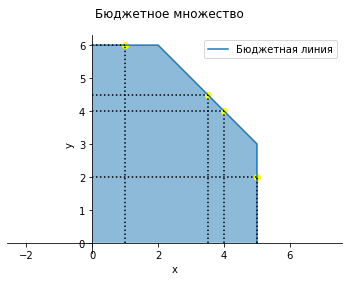

g1_free: 2.0 g2_free 3.0 g1_price: 1 g2_price: 1.0


In [469]:
def get_goods_parameters(list_of_points):
    x_values = []
    y_values = []
    if len(list_of_points) != 4:
        print('неправильные данные')
        return None
    for el1 in list_of_points:
        x_values.append(el1[0])
        y_values.append(el1[1])
        for el2 in list_of_points:
            if el2[0] > el1[0] and el2[1] > el1[1]:
                print("не существует таких параметров")
                return None
    x_values.sort()
    y_values.sort(reverse = True)
    free_y = y_values[1] - (x_values[3] - x_values[1])*(y_values[1] - y_values[2])/(x_values[2] - x_values[1])
    if free_y < y_values[3]:
        print('нет бюджетного множества для данных точек')
        return None
    free_x = (y_values[1] - y_values[0])*(x_values[2] - x_values[1])/(y_values[1] - y_values[2]) + x_values[1]
    if free_x < x_values[0]:
        print('нет бюджетного множества для данных точек')
        return None
    price_x = 1
    price_y = (x_values[2] - x_values[1])/(y_values[1] - y_values[2])
    budget = (x_values[1] - free_x)*price_x + (y_values[1] - free_y)*price_y
    g1 = Good('x', price_x, free_x)
    g2 = Good('y', price_y, free_y)
    
    x_points = [0,g1.free, budget/g1.price + g1.free, budget/g1.price + g1.free] 
    y_points = [budget/g2.price + g2.free,budget/g2.price + g2.free, g2.free, 0]
    

    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")
    
    ax.plot(x_points, y_points, label="Бюджетная линия") # Строим прямую по двум точкам
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5
    
    for i in range(4):
        ax.scatter(x_values[i], y_values[i], color='yellow') # Рисуем точку
        ax.plot([x_values[i], x_values[i]], [0, y_values[i]], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
        ax.plot([0, x_values[i]], [y_values[i], y_values[i]], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)
    
    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    
    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок
    print('g1_free:', g1.free,'g2_free', g2.free, 'g1_price:', g1.price, 'g2_price:', g2.price) #здесь выводим решение
    

get_goods_parameters([[1,6],[3.5,4.5],[4,4],[5,2]])

In [464]:
def interactive_plot(x1, y1, x2, y2, x3, y3, x4, y4):
    get_goods_parameters([[x1,y1],[x2,y2],[x3,y3],[x4,y4]])

interact(interactive_plot, x1=(0, 100), y1 = (0, 100), x2 = (0,100), y2=(0,100), x3=(0,100), y3=(0,100), x4 = (0, 100), y4 = (0, 100));

interactive(children=(IntSlider(value=50, description='x1'), IntSlider(value=50, description='y1'), IntSlider(…

## Кривые безразличия. <font color="red">Задание 8</font> <a id="task_8"></a>

Для двух товаров из Модели 2 и кривой безразличия функции Кобба-Дугласа найдите оптимальное решение и визуализируйте его при помощи интерактивного виджета.

Пример работы расположен по [данной ссылке](https://samonenko-econom-practice-example-streamlit-app-yyqr46.streamlit.app/)

Количество 1 товара: 2 Количество 2 товара: 7.25


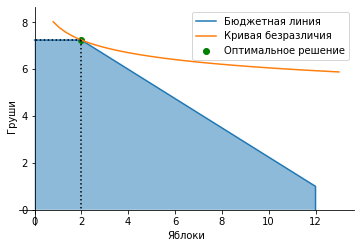

In [468]:
def budget_Cobb_Douglas_solution(g1, g2, budget, alpha=0.5):
    '''
        При заданных ценах на товары, бюджете и параметре alpha находит оптимальное решение и
        значение выражения x^(alpha) * y^(1-alpha)
    '''
    x_solution = (alpha*budget + alpha*g2.price*g2.free + alpha*g1.price*g1.free)/g1.price
    if (x_solution >= (budget/g1.price + g1.free)):
        x_solution = (budget/g1.price + g1.free)
    if (x_solution < g1.free):
        x_solution = g1.free
    y_solution = (budget-g1.price*(x_solution - g1.free))/g2.price + g2.free
    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)

def plot_budget_Cobb_Douglas(g1, g2, budget, alpha=0.5):
    x_solution, y_solution, c = budget_Cobb_Douglas_solution(g1, g2, budget, alpha)
    
    x_points = [0,g1.free, budget/g1.price + g1.free, budget/g1.price + g1.free] 
    y_points = [budget/g2.price + g2.free,budget/g2.price + g2.free, g2.free, 0]
    fig, ax = plt.subplots()
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)
    
    x_values = np.linspace(0.0001, budget/g1.price + g1.free + 1)
    y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values])
    filter = y_values < (budget/g2.price + g2.free + 1)
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()
    print('Количество 1 товара:', x_solution,'Количество 2 товара:', y_solution) #здесь выводим решение

g1 = Good("Яблоки", 5, 2)
g2 = Good("Груши", 8, 1)
budget = 50 
alpha = 0.1
plot_budget_Cobb_Douglas(g1, g2, budget, alpha)

In [427]:
def interactive_plot(p1, p2, f1, f2, budget, alpha):
    g1 = Good("Яблоки", p1, f1)
    g2 = Good("Груши", p2, f2)
    plot_budget_Cobb_Douglas(g1, g2, budget, alpha);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), f1 = (0,10), f2=(0,10), budget=(1,100), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

# Модель 3

## Описание класса. <font color="red">Задание 9</font> <a id="task_9"></a>

В данной модели у каждого товара есть следующие параметры: определено некоторое пороговое значение threshold, а также две цены - $price_1$ и $price_2$. Если количество купленного товара меньше и равна $threshold$, то каждая его единица стоит $price_1$. А каждая единица товара свыше $threshold$ стоит $price_2$.

Например, если $threshold = 3$, $price_1 = 10$ и $price_2 = 5$, то:
* 2 единицы товара стоят 20,
* 3 единицы товара стоят 30,
* 4 единицы товара стоят 35,
* 5 единиц товара стоят 40.

Создайте класс Good для товаров данной модели. Реализуйте в классе метод price(quantity), который будет находить стоимость x товаров данного вида. Реализуйте в классе метод quantity(budget), который будет находить какое количество данного товара можно приобрести за стоимость budget.

In [428]:
# Создадим класс для товаров модели
class Good():
    def __init__(self,name,  threshold, price1, price2):
        self.name = name
        self.price1 = price1
        self.price2 = price2
        self.threshold = threshold
    pass
    
    def price(self, quantity):
        if quantity > self.threshold:
            return (quantity - self.threshold)*self.price2 + (self.threshold)*self.price1
        else:
            return quantity*self.price1
    def quantity(self, budget):
        if budget > self.threshold*self.price1:
            return self.threshold + (budget - self.threshold*self.price1)/self.price2
        if budget <= self.threshold*self.price1:
            return budget/self.price1

## Бюджетное ограничение. <font color="red">Задание 10</font> <a id="task_10"></a>

Напишем функцию, которая проверит удовлетворяет ли конкретная точка бюджетным ограничениям.

In [429]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
        Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    if is_equal(g1.price(x1) + g2.price(x2), budget):
        return 0
    elif g1.price(x1) + g2.price(x2) > budget:
        return -1
    else:
        return 1
    pass

g1 = Good("Яблоки", 5, 10, 3)
g2 = Good("Груши", 3, 8, 3)
budget = 86
print(budget_test(g1, g2, budget, 5, 6))
print(budget_test(g1, g2, budget, 6, 6))
print(budget_test(g1, g2, budget, 6, 7))

1
0
-1


## Графическое и интерактивное представление. <font color="red">Задание 11.</font> <a id="task_11"></a>

Напишите функцию, которая будет визуализировать бюджетное множество и проверяемую точку, а также по аналогии с предыдущими примерами реализуйте интерактивное представление.

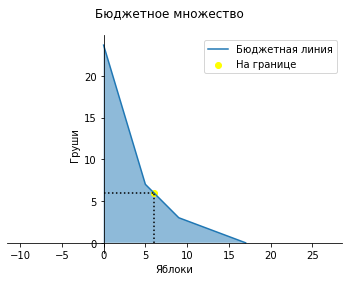

In [430]:
def plot_budget(g1, g2, budget, x1=0, x2=0):
    '''
    Построение графика бюджетного множества и расположения проверяемой точки
    '''
    
    # График будет построен по двум точкам (0, budget/g2.price) и (budget/g1.price, 0),
    # если нельзя купить никакого товара больше чем его значение threshold
    if g1.quantity(budget) <= g1.threshold and g2.quantity(budget) <= g2.threshold:
        x_points = [0, budget/g1.price1] 
        y_points = [budget/g2.price1, 0]
    elif g1.quantity(budget) > g1.threshold and g2.quantity(budget) > g2.threshold:
        if g1.threshold < g1.quantity(budget - g2.threshold*g2.price1):
            x_points = [0, g1.threshold, g1.quantity(budget - g2.threshold*g2.price1), g1.quantity(budget)]
            y_points = [g2.quantity(budget), g2.quantity(budget - g1.threshold*g1.price1), g2.threshold, 0]
        else:
            x_points = [0, g1.quantity(budget - g2.threshold*g2.price1), g1.threshold, g1.quantity(budget)]
            y_points = [g2.quantity(budget), g2.threshold, g2.quantity(budget - g1.threshold*g1.price1), 0]
    elif g1.quantity(budget) <= g1.threshold and g2.quantity(budget) > g2.threshold:
        x_points = [0, g1.quantity(budget - g2.threshold*g2.price1), g1.quantity(budget)]
        y_points = [g2.quantity(budget), g2.threshold, 0]
    else:
        x_points = [0, g1.threshold, g1.quantity(budget)]
        y_points = [g2.quantity(budget), g2.quantity(budget - g1.threshold*g1.price1), 0]

    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")
    
    ax.plot(x_points, y_points, label="Бюджетная линия") # Строим прямую по двум точкам
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5
    
    point_status = budget_test(g1, g2, budget, x1, x2) # Находим статус проверяемой точки
    
    # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else: 
        point_color = "red"
        point_label = "Недопустимо"
    
    ax.scatter(x1, x2, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x1, x1], [0, x2], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
    ax.plot([0, x1], [x2, x2], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)
    
    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    
    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок

g1 = Good("Яблоки", 5, 10, 3)
g2 = Good("Груши", 3, 8, 3)
budget = 86
plot_budget(g1, g2, budget, 6, 6)

In [431]:
def interactive_plot2( threshold1, threshold2, price1_1, price1_2, price2_1, price2_2, budget, x1, x2):
    g1 = Good('x', threshold1, price1_1, price2_1)
    g2 = Good('y', threshold2, price1_2, price2_2)
    plot_budget(g1, g2, budget, x1, x2)

interact(interactive_plot2, threshold1 = (0, 100), threshold2 = (0,100), price1_1 = (1,10), price1_2 = (1, 10), price2_1 = (1, 10), price2_2 = (1, 10), budget = (0, 100), x1 = (0, 10), x2 = (0, 10));

interactive(children=(IntSlider(value=50, description='threshold1'), IntSlider(value=50, description='threshol…

## Обратная задача. <font color="red">Задание 12</font> <a id="task_12"></a>

Пусть нам даны четыре точки $A_1 = (a_{1,1}, a_{1,2})$, $A_2 = (a_{2,1}, a_{2,2})$, $A_3 = (a_{3,1}, a_{3,2})$ и $A_4 = (a_{4,1}, a_{4,2})$. Необходимо определить, существуют ли параметры Модели 3, т.е. значения __threshold > 0__, __price_1 > 0__ и __price_2 > 0__ для двух товаров такие, чтобы граница бюджетной линии содержала указанные точки. Если такие параметры существуют для рассматриваемой модели, то необходимо вывести параметры модели и изобразить ее бюджетное ограничение. Если таких параметров не существует, то необходимо вывести сообщение об этом.

Реализуйте графический интерактивный интерфейс, визуализирующий решение данной задачи по аналогии с тем, как это сделано для Модели 1.

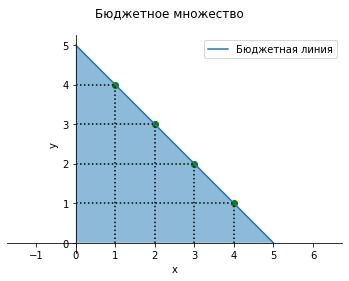

((2, 1, 1.0), (2, 1.0, 1.0))


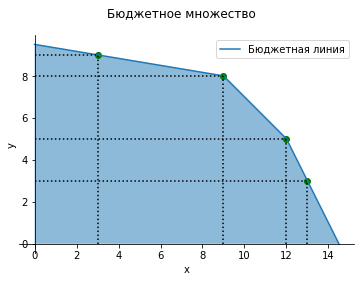

((9, 1, 6.0), (5, 3.0, 6.0))


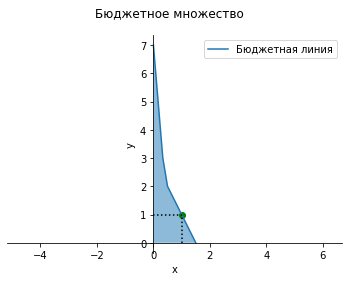

((0.3333333333333333, 1, 0.49999999999999983), (2, 0.24999999999999992, 0.08333333333333331))
не существует таких параметров
None


In [432]:
def get_goods_parameters(list_of_points):
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''
    x_values = []
    y_values = []
    if len(list_of_points) != 4:
        print('неправильные данные')
        return None
    for el1 in list_of_points:
        x_values.append(el1[0])
        y_values.append(el1[1])
        for el2 in list_of_points:
            if (el2[0] > el1[0] and el2[1] >= el1[1]) or (el2[0] >= el1[0] and el2[1] > el1[1]):
                print("не существует таких параметров")
                return None
    x_values = set(x_values)
    y_values = set(y_values)
    x_values = list(x_values)
    y_values = list(y_values)
    x_values.sort()
    y_values.sort(reverse = True)
    or_x_values = x_values.copy()
    or_y_values = y_values.copy()
    if len(x_values) == 1:
        x = x_values[0]
        y = y_values[0]
        if x == 0 and y == 0:
            return 'бюджет равен 0 это никакой график' 
        if x == 0:
            x_values.append(2*x + 1)
            x_values.append(3*x + 2)
            x_values.append(4*x + 3)
            y_values.append(y/2)
            y_values.append(y/3)
            y_values.append(y/4)
        if y == 0:
            x_values.append(x/2)
            x_values.append(x/3)
            x_values.append(x/4)
            y_values.append(2*y + 1)
            y_values.append(3*y + 2)
            y_values.append(4*y + 3)
            
        else:
            x_values.append(x/2)
            x_values.append(x/3)
            x_values.append(x/4)
            y_values.append(2*y)
            y_values.append(3*y)
            y_values.append(4*y)
        x_values.sort()
        y_values.sort(reverse = True)
    if len(x_values) == 2:
        x1 = x_values[0]
        y1 = y_values[0]
        x2 = x_values[1]
        y2 = y_values[1]
        x_values.append(x1/3+2*x2/3)
        x_values.append(2*x1/3 + x2/3)
        y_values.append(y1/3 + 2*y2/3)
        y_values.append(2*y1/3 + y2/3)
        x_values.sort()
        y_values.sort(reverse = True)
    if len(x_values) == 3:
        x1 = x_values[0]
        y1 = y_values[0]
        x2 = x_values[1]
        y2 = y_values[1]
        x_values.append(x1/3+2*x2/3)
        y_values.append(2*y1/3 + y2/3)
        x_values.sort()
        y_values.sort(reverse = True)
    threshold_1 = x_values[1]
    threshold_2 = y_values[2]
    price1_x = 1
    price2_y = (x_values[1] - x_values[0])/(y_values[0] - y_values[1])
    price2_x = price2_y*(y_values[1] - y_values[2])/(x_values[2] - x_values[1])
    price1_y = price2_x*(x_values[3] - x_values[2])/(y_values[2] - y_values[3])
    g1 = Good('x', threshold_1, price1_x, price2_x)
    g2 = Good('y', threshold_2, price1_y, price2_y)
    budget = g1.price(x_values[2]) + g2.price(y_values[2])
    
    '''
    Построение графика бюджетного множества и данных точек
    '''
    
    # График будет построен по двум точкам (0, budget/g2.price) и (budget/g1.price, 0),
    # если нельзя купить никакого товара больше чем его значение threshold
    if g1.quantity(budget) <= g1.threshold and g2.quantity(budget) <= g2.threshold:
        x_points = [0, budget/g1.price1] 
        y_points = [budget/g2.price1, 0]
    elif g1.quantity(budget) > g1.threshold and g2.quantity(budget) > g2.threshold:
        if g1.threshold < g1.quantity(budget - g2.threshold*g2.price1):
            x_points = [0, g1.threshold, g1.quantity(budget - g2.threshold*g2.price1), g1.quantity(budget)]
            y_points = [g2.quantity(budget), g2.quantity(budget - g1.threshold*g1.price1), g2.threshold, 0]
        else:
            x_points = [0, g1.quantity(budget - g2.threshold*g2.price1), g1.threshold, g1.quantity(budget)]
            y_points = [g2.quantity(budget), g2.threshold, g2.quantity(budget - g1.threshold*g1.price1), 0]
    elif g1.quantity(budget) <= g1.threshold and g2.quantity(budget) > g2.threshold:
        x_points = [0, g1.quantity(budget - g2.threshold*g2.price1), g1.quantity(budget)]
        y_points = [g2.quantity(budget), g2.threshold, 0]
    else:
        x_points = [0, g1.threshold, g1.quantity(budget)]
        y_points = [g2.quantity(budget), g2.quantity(budget - g1.threshold*g1.price1), 0]

    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")
    
    ax.plot(x_points, y_points, label="Бюджетная линия") # Строим прямую по двум точкам
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5
    
    
    for i in range(len(or_x_values)):
        x1 = or_x_values[i]
        x2 = or_y_values[i]
        ax.scatter(x1, x2, color='green') # Рисуем точку
        ax.plot([x1, x1], [0, x2], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
        ax.plot([0, x1], [x2, x2], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)

    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    
    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок
    return (threshold_1, price1_x, price2_x), (threshold_2, price1_y, price2_y) # Значения в таком порядке 
    
   

list_of_points = [
    [1,4],
    [2,3],
    [3,2],
    [4,1]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [3,9],
    [9,8],
    [12,5],
    [13,3]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [1,1],
    [1,1],
    [1, 1],
    [1,1]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [1,9],
    [4,5],
    [6,6],
    [7,2]
]
print(get_goods_parameters(list_of_points))


In [433]:
def interactive_plot1(x1, y1, x2, y2, x3, y3, x4, y4):
    print(get_goods_parameters([[x1, y1], [x2, y2], [x3, y3], [x4, y4]]))

interact(interactive_plot1, x1=(0, 100), y1 = (0, 100), x2 = (0,100), y2=(0,100), x3=(0,100), y3=(0,100), x4 = (0, 100), y4 = (0, 100));

interactive(children=(IntSlider(value=50, description='x1'), IntSlider(value=50, description='y1'), IntSlider(…

## Кривые безразличия. <font color="red">Задание 13</font> <a id="task_13"></a>

Для двух товаров из Модели 3 и кривой безразличия функции полезности Кобба-Дугласа найдите оптимальное решение и визуализируйте его при помощи интерактивного виджета.

Опишите, чем качественно ситуация с Моделью 3 отличается от ситуации с Моделями 1 и 2. Приведите примеры параметров Модели 3, которые демонстрируют данные различия.

График бюджетного множества является ломаной состоящей из 1, 2 или 3 отрезков, мы находим максимум на каждом отрезке используя первую функцию нахождения оптимального решения для Кобба-Дугласа, и сравниваем их.

[0, 5, 15.333333333333334, 16.333333333333336]
[30.0, 13.333333333333334, 3, 0]


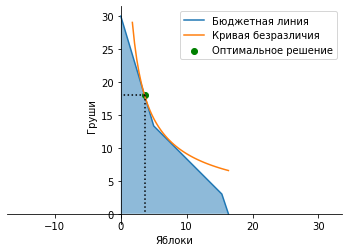

[0, 5, 15.333333333333334, 16.333333333333336]
[30.0, 13.333333333333334, 3, 0]


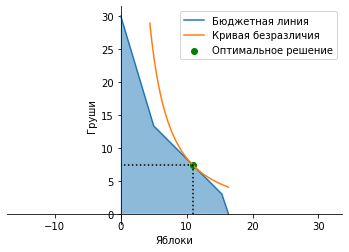

In [434]:
#копипаст первого решения для 1 модели


# Создадим класс для товаров модели
class first_Good():
    def __init__(self, name, price):
        self.name = name
        self.price = price
        
def first_budget_Cobb_Douglas_solution(g1:first_Good, g2:first_Good, budget, alpha=0.5):
    '''
        При заданных ценах на товары, бюджете и параметре alpha находит оптимальное решение и
        значение выражения x^(alpha) * y^(1-alpha)
    '''
    x_solution = alpha*budget/g1.price
    y_solution = (1-alpha)*budget/g2.price
    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)

def first_plot_budget_Cobb_Douglas(g1, g2, budget, alpha=0.5):
    x_solution, y_solution, c = first_budget_Cobb_Douglas_solution(g1, g2, budget, alpha)
    
    x_points = [0, budget/g1.price]
    y_points = [budget/g2.price, 0]
    fig, ax = plt.subplots()
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)
    
    x_values = np.linspace(0.1, budget/g1.price)
    y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values])
    filter = y_values < budget/g2.price
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

def last_budget_Cobb_Douglas_solution(g1, g2, budget, alpha=0.5):
    if g1.quantity(budget) <= g1.threshold and g2.quantity(budget) <= g2.threshold:
        x_points = [0, budget/g1.price1] 
        y_points = [budget/g2.price1, 0]
        new_g1 = first_Good(g1.name, g1.price1)
        new_g2 = first_Good(g2.name, g2.price1)
        first_plot_budget_Cobb_Douglas(new_g1, new_g2, budget, alpha)
    elif g1.quantity(budget) > g1.threshold and g2.quantity(budget) > g2.threshold:
        if g1.threshold < g1.quantity(budget - g2.threshold*g2.price1):
            x_points = [0, g1.threshold, g1.quantity(budget - g2.threshold*g2.price1), g1.quantity(budget)]
            y_points = [g2.quantity(budget), g2.quantity(budget - g1.threshold*g1.price1), g2.threshold, 0]
        else:
            x_points = [0, g1.quantity(budget - g2.threshold*g2.price1), g1.threshold, g1.quantity(budget)]
            y_points = [g2.quantity(budget), g2.threshold, g2.quantity(budget - g1.threshold*g1.price1), 0]
        price_x = 1
        if (y_points[0] - y_points[1]) != 0:
            price_y = (x_points[1] - x_points[0])/(y_points[0] - y_points[1])
        else:
            price_y = 1
        budget = y_points[0]*price_y
        new_g1 = first_Good(g1.name, price_x)
        new_g2 = first_Good(g2.name, price_y)
        x_solution1, y_solution1, c1 = first_budget_Cobb_Douglas_solution(new_g1, new_g2, budget, alpha)
        if x_solution1 > x_points[1]:
            x_solution1 = x_points[1]
            y_solution1 = y_points[1]
            c1 = math.pow(x_solution1, alpha)*math.pow(y_solution1, 1-alpha)
        price_x = 1
        if (y_points[1] - y_points[2]) != 0:
            price_y = (x_points[2] - x_points[1])/(y_points[1] - y_points[2])
        else:
            price_y = 1
        budget = y_points[1]*price_y + x_points[1]*price_x
        new_g1 = first_Good(g1.name, price_x)
        new_g2 = first_Good(g2.name, price_y)
        x_solution2, y_solution2, c2 = first_budget_Cobb_Douglas_solution(new_g1, new_g2, budget, alpha)
        if x_solution2 > x_points[2]:
            x_solution2 = x_points[2]
            y_solution2 = y_points[2]
            c2 = math.pow(x_solution2, alpha)*math.pow(y_solution2, 1-alpha)
        if x_solution2 < x_points[1]:
            x_solution2 = x_points[1]
            y_solution2 = y_points[1]
            c2 = math.pow(x_solution2, alpha)*math.pow(y_solution2, 1-alpha)
        price_x = 1
        if (y_points[2] - y_points[3]) != 0:
            price_y = (x_points[3] - x_points[2])/(y_points[2] - y_points[3])
        else:
            price_y = 1
        budget = y_points[2]*price_y + x_points[2]*price_x
        new_g1 = first_Good(g1.name, price_x)
        new_g2 = first_Good(g2.name, price_y)
        x_solution3, y_solution3, c3 = first_budget_Cobb_Douglas_solution(new_g1, new_g2, budget, alpha)
        if x_solution3 > x_points[3]:
            x_solution3 = x_points[3]
            y_solution3 = y_points[3]
            c3 = math.pow(x_solution3, alpha)*math.pow(y_solution3, 1-alpha)
        if x_solution3 < x_points[2]:
            x_solution3 = x_points[2]
            y_solution3 = y_points[2]
            c3 = math.pow(x_solution3, alpha)*math.pow(y_solution3, 1-alpha)
        if c3 >= max(c2, c1):
            return (x_solution3, y_solution3, c3)
        if c2 >= max(c1, c3):
            return (x_solution2, y_solution2, c2)
        if c1 >= max(c2, c3):
            return (x_solution1, y_solution1, c1)
    elif g1.quantity(budget) <= g1.threshold and g2.quantity(budget) > g2.threshold:
        x_points = [0, g1.quantity(budget - g2.threshold*g2.price1), g1.quantity(budget)]
        y_points = [g2.quantity(budget), g2.threshold, 0]
        price_x = 1
        price_y = (x_points[1] - x_points[0])/(y_points[0] - y_points[1])
        budget = y_points[0]*price_y
        new_g1 = first_Good(g1.name, price_x)
        new_g2 = first_Good(g2.name, price_y)
        x_solution1, y_solution1, c1 = first_budget_Cobb_Douglas_solution(new_g1, new_g2, budget, alpha)
        if x_solution1 > x_points[1]:
            x_solution1 = x_points[1]
            y_solution1 = y_points[1]
            c1 = math.pow(x_solution1, alpha)*math.pow(y_solution1, 1-alpha)
        price_x = 1
        if (y_points[1] - y_points[2]) != 0:
            price_y = (x_points[2] - x_points[1])/(y_points[1] - y_points[2])
        else:
            price_y = 1
        budget = y_points[1]*price_y + x_points[1]*price_x
        new_g1 = first_Good(g1.name, price_x)
        new_g2 = first_Good(g2.name, price_y)
        x_solution2, y_solution2, c2 = first_budget_Cobb_Douglas_solution(new_g1, new_g2, budget, alpha)
        if x_solution2 > x_points[2]:
            x_solution2 = x_points[2]
            y_solution2 = y_points[2]
            c2 = math.pow(x_solution2, alpha)*math.pow(y_solution2, 1-alpha)
        if x_solution2 < x_points[1]:
            x_solution2 = x_points[1]
            y_solution2 = y_points[1]
            c2 = math.pow(x_solution2, alpha)*math.pow(y_solution2, 1-alpha)
        if c2 >= c1:
            return (x_solution2, y_solution2, c2)
        if c1 > c2:
            return (x_solution1, y_solution1, c1)
    else:
        x_points = [0, g1.threshold, g1.quantity(budget)]
        y_points = [g2.quantity(budget), g2.quantity(budget - g1.threshold*g1.price1), 0]
        price_x = 1
        if (y_points[0] - y_points[1]) != 0:
            price_y = (x_points[1] - x_points[0])/(y_points[0] - y_points[1])
        else:
            price_y = 1
        budget = y_points[0]*price_y
        new_g1 = first_Good(g1.name, price_x)
        new_g2 = first_Good(g2.name, price_y)
        x_solution1, y_solution1, c1 = first_budget_Cobb_Douglas_solution(new_g1, new_g2, budget, alpha)
        if x_solution1 > x_points[1]:
            x_solution1 = x_points[1]
            y_solution1 = y_points[1]
            c1 = math.pow(x_solution1, alpha)*math.pow(y_solution1, 1-alpha)
        price_x = 1
        if (y_points[1] - y_points[2]) != 0:
            price_y = (x_points[2] - x_points[1])/(y_points[1] - y_points[2])
        else:
            price_y = 1
        budget = y_points[1]*price_y + x_points[1]*price_x
        new_g1 = first_Good(g1.name, price_x)
        new_g2 = first_Good(g2.name, price_y)
        x_solution2, y_solution2, c2 = first_budget_Cobb_Douglas_solution(new_g1, new_g2, budget, alpha)
        if x_solution2 > x_points[2]:
            x_solution2 = x_points[2]
            y_solution2 = y_points[2]
            c2 = math.pow(x_solution2, alpha)*math.pow(y_solution2, 1-alpha)
        if x_solution2 < x_points[1]:
            x_solution2 = x_points[1]
            y_solution2 = y_points[1]
            c2 = math.pow(x_solution2, alpha)*math.pow(y_solution2, 1-alpha)
        if c2 >= c1:
            return (x_solution2, y_solution2, c2)
        if c1 > c2:
            return (x_solution1, y_solution1, c1)
        

def plot_budget_Cobb_Douglas(g1, g2, budget, alpha=0.5):
    if last_budget_Cobb_Douglas_solution(g1, g2, budget, alpha) is None:
        return None
    x_solution, y_solution, c = last_budget_Cobb_Douglas_solution(g1, g2, budget, alpha)
    if g1.quantity(budget) <= g1.threshold and g2.quantity(budget) <= g2.threshold:
        x_points = [0, budget/g1.price1] 
        y_points = [budget/g2.price1, 0]
    elif g1.quantity(budget) > g1.threshold and g2.quantity(budget) > g2.threshold:
        if g1.threshold < g1.quantity(budget - g2.threshold*g2.price1):
            x_points = [0, g1.threshold, g1.quantity(budget - g2.threshold*g2.price1), g1.quantity(budget)]
            y_points = [g2.quantity(budget), g2.quantity(budget - g1.threshold*g1.price1), g2.threshold, 0]
        else:
            x_points = [0, g1.quantity(budget - g2.threshold*g2.price1), g1.threshold, g1.quantity(budget)]
            y_points = [g2.quantity(budget), g2.threshold, g2.quantity(budget - g1.threshold*g1.price1), 0]
    elif g1.quantity(budget) <= g1.threshold and g2.quantity(budget) > g2.threshold:
        x_points = [0, g1.quantity(budget - g2.threshold*g2.price1), g1.quantity(budget)]
        y_points = [g2.quantity(budget), g2.threshold, 0]
    else:
        x_points = [0, g1.threshold, g1.quantity(budget)]
        y_points = [g2.quantity(budget), g2.quantity(budget - g1.threshold*g1.price1), 0]
    print(x_points)
    print(y_points)
    fig, ax = plt.subplots()
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)
    
    x_values = np.linspace(0.1, x_points[-1])
    y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values])
    filter = y_values < y_points[0]
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()
        

g1 = Good("Яблоки", 5, 10, 3)
g2 = Good("Груши", 3, 1, 3)
budget = 84
alpha = 0.4
plot_budget_Cobb_Douglas(g1, g2, budget, alpha)
#данный случай показывает, что точка максимума может лежать на любой прямой не обязательно центральной
g1 = Good("Яблоки", 5, 10, 3)
g2 = Good("Груши", 3, 1, 3)
budget = 84
alpha = 0.6
plot_budget_Cobb_Douglas(g1, g2, budget, alpha)


In [435]:
def interactive_plot3( threshold1, threshold2, price1_1, price1_2, price2_1, price2_2, budget, alpha):
    g1 = Good('x', threshold1, price1_1, price2_1)
    g2 = Good('y', threshold2, price1_2, price2_2)
    plot_budget_Cobb_Douglas(g1, g2, budget, alpha)

interact(interactive_plot3, threshold1 = (0, 10), threshold2 = (0,10), price1_1 = (1,10), price1_2 = (1, 10), price2_1 = (1, 10), price2_2 = (1, 10), budget = (0, 100), alpha = (0.1,0.9))

interactive(children=(IntSlider(value=5, description='threshold1', max=10), IntSlider(value=5, description='th…

<function __main__.interactive_plot3(threshold1, threshold2, price1_1, price1_2, price2_1, price2_2, budget, alpha)>